Text(0, 0.5, 'y')

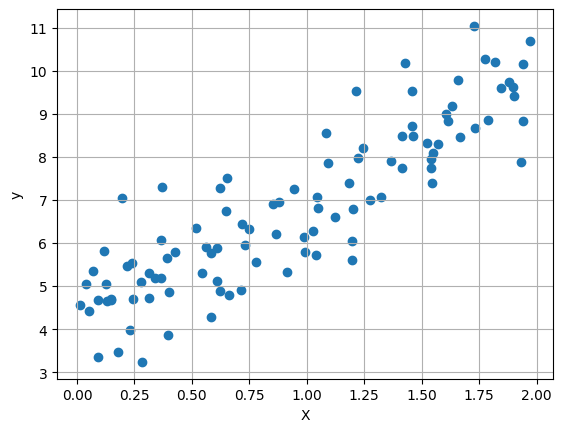

In [5]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
m=100
X = 2*np.random.rand(m, 1)
y = 4 + 3*X+np.random.randn(m, 1)
plt.scatter(X, y)
plt.grid(True)
plt.xlabel("X")
plt.ylabel("y")

In [6]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [7]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [8]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

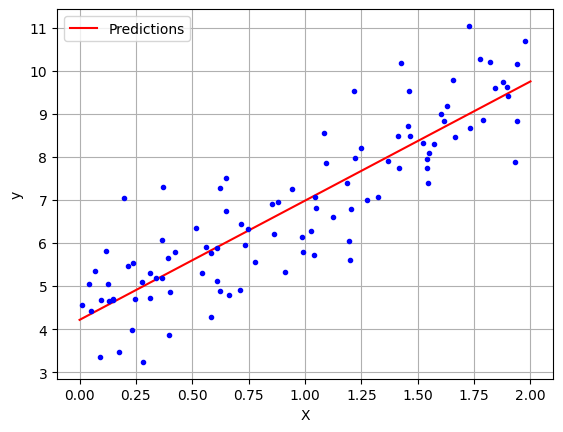

In [12]:
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")
plt.grid(True)
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [13]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [14]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

In [15]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

In [16]:
np.linalg.pinv(X_b) @ y

array([[4.21509616],
       [2.77011339]])

Batch gradient Descent

In [17]:
eta = 0.1
n_epochs = 1000
m = len(X_b)

np.random.seed(42)
theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    gradients = 2/m * X_b.T @ (X_b @ theta-y)
    theta = theta - eta * gradients

theta

array([[4.21509616],
       [2.77011339]])

Stochastic Gradient Descent

In [18]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0/(t+t1)

np.random.seed(42)
theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for iteration in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index+1]
        yi = y[random_index : random_index+1]
        gradients = 2 * xi.T @ (xi @ theta-yi)
        eta = learning_schedule(epoch*m+iteration)
        theta = theta-eta * gradients
theta

array([[4.21076011],
       [2.74856079]])

SGD regressor

In [20]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01, n_iter_no_change=100, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_ 

(array([4.21278812]), array([2.77270267]))

making new data with quadratic equation

Text(0, 0.5, 'y')

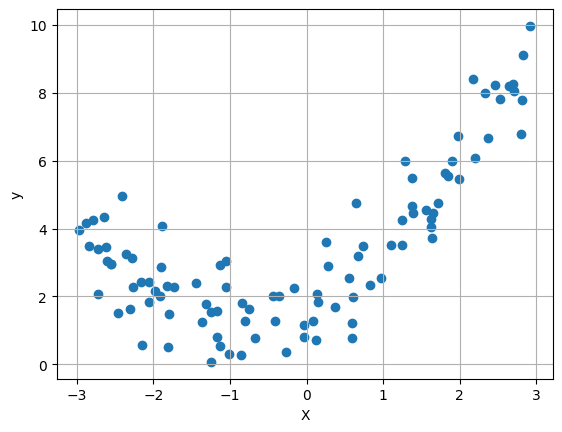

In [22]:
np.random.seed(42)
m=100
X = 6 * np.random.rand(m, 1)-3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)
plt.scatter(X, y)
plt.grid(True)
plt.xlabel("X")
plt.ylabel("y")

using linear regression for moddeling a polynomial graph

In [24]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0])
X_poly[0]

[-0.75275929]


array([-0.75275929,  0.56664654])

In [28]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_
y_predict = lin_reg.predict(X)
plt.scatter(X, y)
plt.plot(X, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")
plt.grid(True)
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

ValueError: X has 1 features, but LinearRegression is expecting 2 features as input.